<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Earnings_Forecasting_in_the_Finance_Sect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate a date range
date_range = pd.date_range(start='2015-01-01', end='2024-01-01', freq='M')

# Simulate revenue with an upward trend and seasonality
trend = np.linspace(100, 500, len(date_range))
seasonal = 50 * np.sin(2 * np.pi * date_range.month / 12)
noise = np.random.normal(0, 20, len(date_range))
revenue = trend + seasonal + noise

# Simulate expenses with a smaller trend and different seasonality
expenses_trend = np.linspace(50, 250, len(date_range))
expenses_seasonal = 30 * np.sin(2 * np.pi * (date_range.month + 3) / 12)
expenses_noise = np.random.normal(0, 15, len(date_range))
expenses = expenses_trend + expenses_seasonal + expenses_noise

# Create a DataFrame
data = pd.DataFrame({'date': date_range, 'revenue': revenue, 'expenses': expenses})
data.set_index('date', inplace=True)
print(data.head())


               revenue   expenses
date                             
2015-01-31  134.934283  79.844018
2015-02-28  144.274302  65.752470
2015-03-31  170.430406  24.956750
2015-04-30  184.976821  40.209769
2015-05-31  135.270204  32.399327


<ipython-input-1-7008ade895ab>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2015-01-01', end='2024-01-01', freq='M')


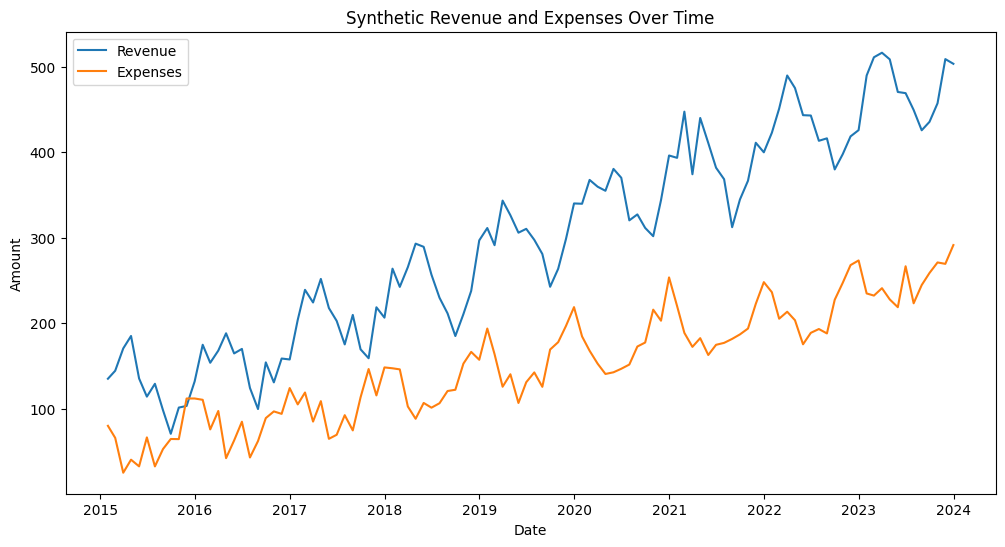

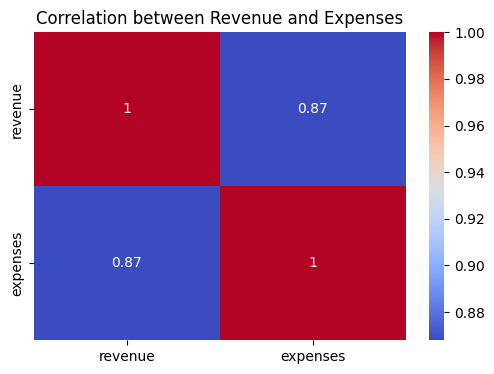

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the revenue and expenses over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['revenue'], label='Revenue')
plt.plot(data.index, data['expenses'], label='Expenses')
plt.legend()
plt.title("Synthetic Revenue and Expenses Over Time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Revenue and Expenses")
plt.show()


In [3]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA on synthetic revenue data
arima_model = ARIMA(data['revenue'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast for the next 12 months
forecast_arima = arima_result.forecast(steps=12)
print("ARIMA Forecast:\n", forecast_arima)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMA Forecast:
 2024-01-31    505.079549
2024-02-29    504.434193
2024-03-31    504.696464
2024-04-30    504.589878
2024-05-31    504.633194
2024-06-30    504.615591
2024-07-31    504.622745
2024-08-31    504.619837
2024-09-30    504.621019
2024-10-31    504.620539
2024-11-30    504.620734
2024-12-31    504.620655
Freq: ME, Name: predicted_mean, dtype: float64


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r_tnjpj/xvj9c7mm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r_tnjpj/afatdt0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20907', 'data', 'file=/tmp/tmp7r_tnjpj/xvj9c7mm.json', 'init=/tmp/tmp7r_tnjpj/afatdt0q.json', 'output', 'file=/tmp/tmp7r_tnjpj/prophet_modeltis1y7uw/prophet_model-20241102121627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:16:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:16:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

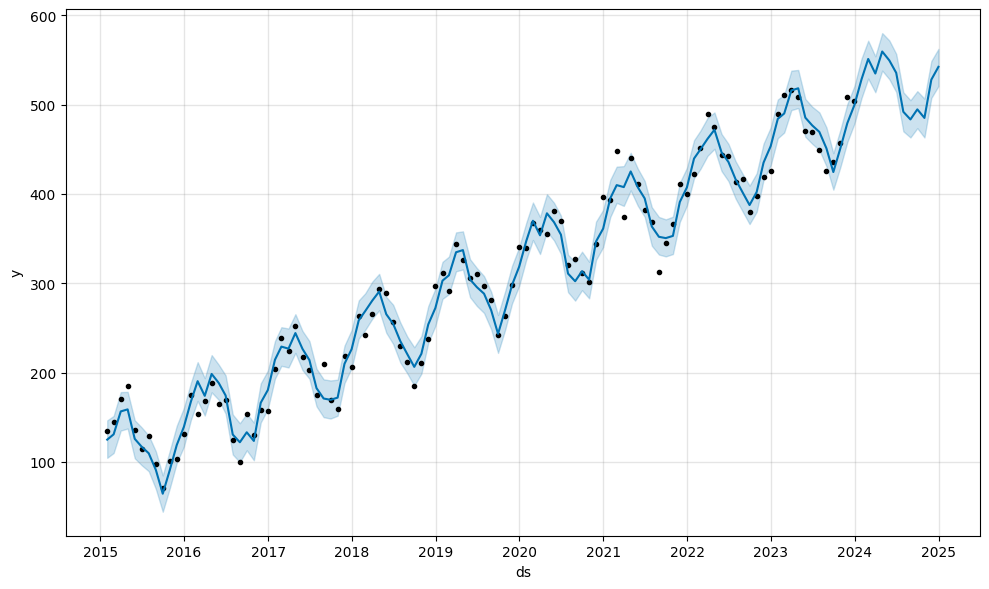

In [4]:
from prophet import Prophet

# Prepare data for Prophet
df_prophet = data['revenue'].reset_index().rename(columns={'date': 'ds', 'revenue': 'y'})

# Define and train the Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Forecast for the next 12 months
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast_prophet = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast_prophet)
plt.show()


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Simulated true values (last 12 months of original data)
y_true = data['revenue'][-12:]

# ARIMA evaluation
y_pred_arima = forecast_arima
mae_arima = mean_absolute_error(y_true, y_pred_arima)
rmse_arima = mean_squared_error(y_true, y_pred_arima, squared=False)
print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}")

# Prophet evaluation
y_pred_prophet = forecast_prophet['yhat'][-12:]
mae_prophet = mean_absolute_error(y_true, y_pred_prophet)
rmse_prophet = mean_squared_error(y_true, y_pred_prophet, squared=False)
print(f"Prophet MAE: {mae_prophet}, RMSE: {rmse_prophet}")


ARIMA MAE: 30.28219663517873, RMSE: 39.95315422785841
Prophet MAE: 44.79913849867023, RMSE: 48.205458536945955


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
